**Logistic Regression 3 class problem - Iris Dataset**

Importing Dependencies

In [9]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

### Import Dataset

In [2]:
data = datasets.load_iris()

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Splitting into train and test Dataset


In [5]:
x = pd.DataFrame(data.data, columns= data.feature_names)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [16]:
y_train

array([1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2,
       0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0])

In [6]:
x_train.shape

(105, 4)

In [7]:
x_test.shape

(45, 4)

### Feature Scaling

In [8]:
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

### Implementing Logistic Regression from scratch


In [102]:
class Logistic_Regression:
  def __init__(self,learning_rate=0.1, num_of_iterations=10000):
    self.learning_rate= learning_rate
    self.num_of_iterations= num_of_iterations
  
  def train(self, X,y):
    #m= number of validation samples, n= number of features
    self.m, self.n= X.shape

    # initialising weight and bias values
    self.weights= np.zeros(self.n)
    self.bias= 0

    #array to store training cost
    self.training_cost=[]

    for _ in range(self.num_of_iterations):
      # calculating hypothesis for each record for training data
      y_hat= 1/ (1+np.exp (-(X.dot(self.weights)+self.bias)))

      #calculating training cost
      # training_cost= (-1 / self.m) * np.sum(y * np.log(y_hat)+ (1 - y) * np.log(1 - y_hat))
      # self.training_cost.append(training_cost)

      #calculating derivatives
      dw = (1/ self.m) * np.dot(X.T, (y_hat - y))
      db= (1/self.m)* np.sum(y_hat - y)

      # updating the values of weights and beta using gradient descent
      self.weights -= self.learning_rate*dw
      self.bias -= self.learning_rate* db

  def predict(self, X, threshold=0.5):
    y_pred= 1/ (1+np.exp(-(X.dot(self.weights)+self.bias)))
    # y_pred= np.where(y_pred>threshold, 1,0)

    return y_pred

### Model for Setosa

In [103]:
setosa_model = Logistic_Regression()

In [104]:
#fitting into model
#changing label for setosa =1 
y_train_setosa= np.where(y_train == 0, 1,0)

setosa_model.train(x_train, y_train_setosa)
setosa_pred= setosa_model.predict(x_test, y_test)

In [105]:
setosa_pred

array([9.99038911e-01, 2.17543884e-06, 3.13665465e-03, 9.99968296e-01,
       9.99395336e-01, 9.98141033e-01, 1.28226782e-05, 3.29322821e-04,
       1.14669214e-06, 3.10783173e-04, 7.45110716e-04, 4.17265163e-04,
       4.02868783e-04, 4.29146817e-04, 1.10762952e-06, 4.12082943e-05,
       2.35197329e-07, 9.99410032e-01, 9.99967947e-01, 4.85042480e-04,
       9.97722922e-01, 7.43506385e-06, 1.96159859e-04, 2.07332481e-07,
       9.99656643e-01, 9.78389215e-01, 9.87100306e-01, 9.75209031e-01,
       3.40484402e-04, 9.91064052e-01, 9.98226213e-01, 4.90246087e-06,
       9.96312087e-01, 9.79843343e-01, 4.33155346e-06, 4.96588874e-01,
       2.15755175e-06, 5.30967170e-04, 1.97544697e-04, 3.30059806e-08,
       9.97941928e-01, 7.64214802e-07, 9.98716656e-01, 1.51045951e-04,
       2.74963402e-04])

### Model for Versicolor

In [106]:
versi_model= Logistic_Regression()

In [107]:
#fitting into model
#changing label for versicolor=1 
y_train_versi= np.where(y_train == 1, 1,0)

versi_model.train(x_train, y_train_versi)
versi_pred= versi_model.predict(x_test, y_test)

In [108]:
versi_pred

array([0.04554229, 0.1927097 , 0.30780601, 0.0084595 , 0.07758821,
       0.1005764 , 0.14676606, 0.65728065, 0.62065374, 0.76549187,
       0.23996325, 0.5401262 , 0.51343471, 0.38368585, 0.39370274,
       0.05572698, 0.78109107, 0.0849616 , 0.01879372, 0.50532246,
       0.18015427, 0.41596417, 0.47066112, 0.66698534, 0.04461671,
       0.14452236, 0.30071429, 0.30717132, 0.50513993, 0.33866657,
       0.1285371 , 0.58668032, 0.20425751, 0.35765975, 0.05122483,
       0.75581077, 0.17945427, 0.78728638, 0.65121676, 0.72585963,
       0.13558174, 0.35287378, 0.11751459, 0.56808651, 0.66547846])

### Model for Virginica

In [109]:
verginica_model= Logistic_Regression()

In [110]:
#fitting into model
#changing label for virginca=1 
y_train_verginica= np.where(y_train == 2, 1,0)

verginica_model.train(x_train, y_train_verginica)
verginica_pred= verginica_model.predict(x_test, y_test)

In [111]:
verginica_pred

array([1.66630644e-09, 9.99464183e-01, 3.20608421e-02, 3.82101480e-11,
       6.91722855e-11, 2.55330678e-10, 9.98892774e-01, 1.94674269e-02,
       9.94448860e-01, 1.04146122e-02, 1.26739688e-01, 9.04851265e-02,
       1.61300504e-01, 1.80832954e-01, 9.99707652e-01, 9.99652162e-01,
       9.98571640e-01, 9.66567191e-11, 1.04527297e-11, 1.82106843e-02,
       4.41697347e-10, 9.96883800e-01, 2.87027328e-01, 9.98776080e-01,
       1.71655503e-10, 6.83918571e-09, 5.53033127e-10, 1.37527985e-09,
       2.61045164e-02, 2.32297493e-10, 1.31768225e-10, 9.44808732e-01,
       4.69197626e-10, 4.99460501e-10, 9.99962979e-01, 8.58572142e-09,
       9.99947547e-01, 3.10124893e-03, 8.58008368e-02, 9.99903283e-01,
       4.21760124e-11, 9.99877181e-01, 1.07249771e-10, 5.43689919e-02,
       1.11310701e-01])

### Assigning Class on the basis of probability

In [112]:
probabilities= pd.DataFrame({ 0:setosa_pred , 1: versi_pred , 2:verginica_pred  })
probabilities

,0,1,2
0,9.990389e-01,0.045542,1.666306e-09
1,2.175439e-06,0.192710,9.994642e-01
2,3.136655e-03,0.307806,3.206084e-02
3,9.999683e-01,0.008459,3.821015e-11
4,9.993953e-01,0.077588,6.917229e-11
5,9.981410e-01,0.100576,2.553307e-10
6,1.282268e-05,0.146766,9.988928e-01
7,3.293228e-04,0.657281,1.946743e-02
8,1.146692e-06,0.620654,9.944489e-01
9,3.107832e-04,0.765492,1.041461e-02


In [113]:
classAssigned= probabilities.idxmax(axis=1)

In [114]:
classAssigned

0     0
1     2
2     1
3     0
4     0
5     0
6     2
7     1
8     2
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    0
18    0
19    1
20    0
21    2
22    1
23    2
24    0
25    0
26    0
27    0
28    1
29    0
30    0
31    2
32    0
33    0
34    2
35    1
36    2
37    1
38    1
39    2
40    0
41    2
42    0
43    1
44    1
dtype: int64

### Calculating Accuracy and Displaying Confusion Matrix

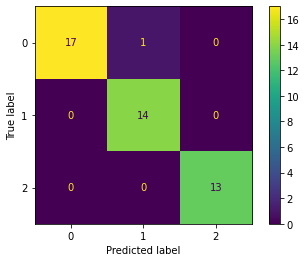

In [115]:
#Displaying Confusions Matrix
cnf_matrix= metrics.confusion_matrix(y_test, classAssigned)
disp = metrics.ConfusionMatrixDisplay(cnf_matrix)

disp.plot()
plt.show()

In [118]:
# Calculatig Accuracy
def accuracy( actual , predicted, class_label):
  ctr=0
  unique, count= np.unique(actual, return_counts=True)
  test_count= dict(zip(unique, count))

  for i in range(len(actual)):
    if actual[i]== class_label and predicted[i]== class_label:
      ctr= ctr+1

  return ( ctr/ test_count[class_label])

In [119]:
print(f'Accuracy for class Setosa', accuracy(y_test, classAssigned , 0))

Accuracy for class Setosa 0.9444444444444444


In [121]:
print(f'Accuracy for class Versicolor', accuracy(y_test, classAssigned , 1))

Accuracy for class Versicolor 1.0


In [123]:
print(f'Accuracy for class Virginica', accuracy(y_test, classAssigned , 2))

Accuracy for class Virginica 1.0
